# <center> Projet - Partie 1 - BDA</center>
<center>
Esterbet Julien - Legeard Hugo <br>
2022-2023 <br>
M1 EIT FinTech - ISTIC - Université de Rennes 1<br> <br>
</center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
# from eval_student_37 import evaluation_function

<center>########################################## 1 ########################################## <br>
You can run the cell you prefer depending of the paths of your files, of course, feel free to change them as you want.</center>

In [3]:
unames = ['movie_id', 'Title', 'genres']
movies = pd.read_csv('movies.csv', header = None, names = unames, sep = '::', engine = 'python')
print(movies.head(), end='\n\n')
ratings = pd.read_csv('ratings_train.csv', index_col = 0)
print(ratings.head(), end='\n\n')
ratings_test = pd.read_csv('ratings_test.csv', index_col = 0)

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv('users.csv', sep = '::', header = None, names = unames, engine = 'python')
print(users.head())

   movie_id                               Title                         genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy;
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy;
2         3             Grumpier Old Men (1995)                Comedy|Romance;
3         4            Waiting to Exhale (1995)                  Comedy|Drama;
4         5  Father of the Bride Part II (1995)                        Comedy;

   user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291

   user_id gender  age  occupation    zip
0        1      F    1          10  48067
1        2      M   56          16  70072
2        3      M   25          15  55117
3        4      M   45           7  02460
4        5      M   25          20  55455


<center>######################################## 1.1 ######################################## <br><br>
######################################## 1.1.1 ########################################
</center>

In [4]:
def create_new_column_year(x):
    return x.split('(')[-1].replace(')', '')

def delete_string_inside_parenthesis(x):
    return x.split(' (')[0] 

print(movies.head(), end='\n\n')
movies['Year'] = movies['Title'].apply(create_new_column_year)
movies['Title'] = movies['Title'].apply(delete_string_inside_parenthesis)
print(movies.head())

   movie_id                               Title                         genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy;
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy;
2         3             Grumpier Old Men (1995)                Comedy|Romance;
3         4            Waiting to Exhale (1995)                  Comedy|Drama;
4         5  Father of the Bride Part II (1995)                        Comedy;

   movie_id                        Title                         genres  Year
0         1                    Toy Story   Animation|Children's|Comedy;  1995
1         2                      Jumanji  Adventure|Children's|Fantasy;  1995
2         3             Grumpier Old Men                Comedy|Romance;  1995
3         4            Waiting to Exhale                  Comedy|Drama;  1995
4         5  Father of the Bride Part II                        Comedy;  1995


<center>######################################## 1.1.2 ########################################
</center>

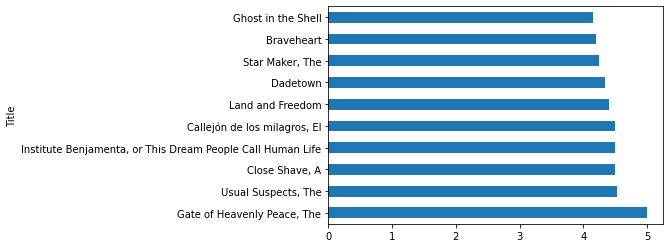

The best movie of 1995 is : Index(['Gate of Heavenly Peace, The'], dtype='object', name='Title') with a mean of 5.0 and a total of people that rated the movie of 1.


"Best 1995 movie : 'Gate of Heavenly Peace, The'\nMean : 5.0\nNumber of ratings : 1"

In [5]:
def best_movie_by_year(year):
    """Find the best movie by year"""
    movies_year = movies[movies['Year'] == year]
    movies_year_ratings = pd.merge(movies_year, ratings, on='movie_id')
    """We group by the title and calculate the mean of the ratings"""
    movies_year_ratings_mean = movies_year_ratings.groupby('Title')['rating'].mean().sort_values(ascending=False)
    """We plot the top 10 movies to have a better view"""
    movies_year_ratings_mean.head(10).plot(kind='barh')
    plt.show()
    return "The best movie of " + str(year) + " is : " + str(movies_year_ratings_mean.head(1).index) + " with a mean of " + str(movies_year_ratings_mean.head(1)[0]) + " and a total of people that rated the movie of " + str(movies_year_ratings[movies_year_ratings['Title'] == movies_year_ratings_mean.head(1).index[0]]['rating'].count()) + "."
print(best_movie_by_year('1995'))

"""Best 1995 movie : 'Gate of Heavenly Peace, The'
Mean : 5.0
Number of ratings : 1"""

<center>######################################## 1.1.3 ########################################
</center>

In [6]:
# Same question but only consider movies with at least 10 ratings from users
def best_movie_by_year_10_ratings(year):
    """Find the best movie by year"""
    movies_year = movies[movies['Year'] == year]
    movies_year_ratings = pd.merge(movies_year, ratings, on='movie_id')
    """We group by the title and calculate the mean of the ratings"""
    movies_year_ratings_mean = movies_year_ratings.groupby('Title')['rating'].mean().sort_values(ascending=False)
    """Here we count the number of ratings for each movies in 1995"""
    movies_year_ratings_count = movies_year_ratings.groupby('Title')['rating'].count()
    """And we keep those with more than 10 ratings"""
    movies_year_10_ratings = movies_year_ratings_count[movies_year_ratings_count > 10]
    """Whe get the mean of the ratings for the movies with more than 10 ratings"""
    movies_year_10_ratings_mean = movies_year_ratings_mean[movies_year_ratings_mean.index.isin(movies_year_10_ratings.index)].sort_values(ascending=False)
    """And show the best one"""
    return movies_year_10_ratings_mean.head(10)

print(best_movie_by_year_10_ratings('1995'))

Title
Usual Suspects, The           4.519763
Close Shave, A                4.500000
Braveheart                    4.197183
Ghost in the Shell            4.148148
Toy Story                     4.134426
Persuasion                    4.120000
City of Lost Children, The    4.089552
Apollo 13                     4.070270
Celluloid Closet, The         4.042553
Seven                         4.026866
Name: rating, dtype: float64


<center>######################################## 1.1.4 ########################################
</center>

Year
<1940           52.580952
[1940,1960[     59.200787
[1960, 1980[    89.248175
>1980           87.838871
dtype: float64

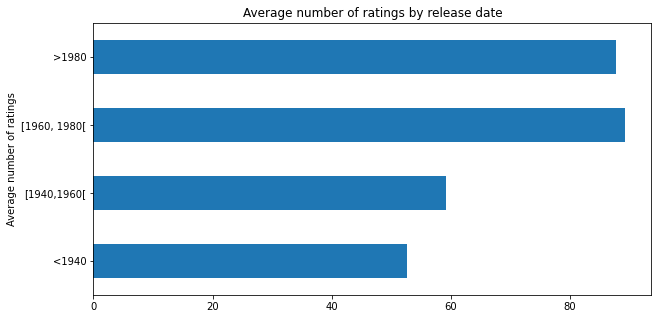

In [7]:
"""Here we show the average number of ratings of movies depending on their release date"""
movies['Year'] = pd.to_numeric(movies['Year'])
movies['Year'] = pd.cut(movies['Year'], bins=[0, 1940, 1959, 1979, 2020], labels=['<1940', '[1940,1960[', '[1960, 1980[', '>1980'])
movies_and_ratings = pd.merge(movies, ratings, on='movie_id')

ratings_by_bins = movies_and_ratings.groupby('Year')['rating'].count()
movies_by_bins = movies_and_ratings.groupby('Year')['movie_id'].nunique()
avgNumber_ratings_by_bins = ratings_by_bins/movies_by_bins
avgNumber_ratings_by_bins.plot(kind='barh', title='Average number of ratings by release date', ylabel='Release date', xlabel='Average number of ratings', figsize=(10, 5))
avgNumber_ratings_by_bins

<center>######################################## 1.1.5 ########################################
</center>

In [10]:
"""Here is the average rating in the dataset"""
average_rating = ratings['rating'].mean()
average_rating

3.559247773012207

<center>######################################## 1.1.6 ########################################
</center>

In [8]:
"""Here is the average rating given by user 148"""
average_rating_user_148 = ratings[ratings['user_id'] == 148]['rating'].mean()
average_rating_user_148

3.733974358974359

<center>######################################## 1.1.7 ########################################
</center>

4    242
5    238
3    106
2     22
1      2
Name: rating, dtype: int64

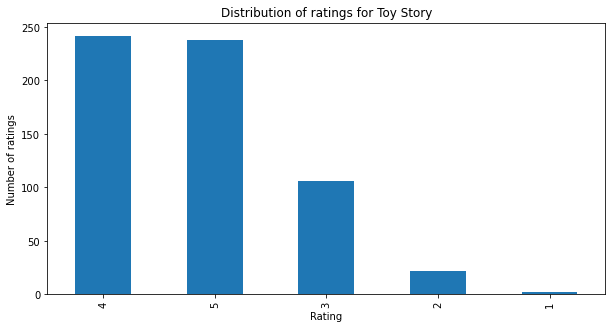

In [9]:
"""Here is the distribution of ratings for the movie ’Toy Story’, so that we can see if it is a good movie or not."""
id_toy_story = movies[movies['Title'] == 'Toy Story']['movie_id'].iloc[0]
toy_story_ratings = ratings[ratings['movie_id'] == id_toy_story]['rating']
toy_story_ratings_count = toy_story_ratings.value_counts()

toy_story_ratings_count.plot(kind='bar', title='Distribution of ratings for Toy Story', ylabel='Number of ratings', xlabel='Rating', figsize=(10, 5))
toy_story_ratings_count

<center>######################################## 1.1.8 ########################################
</center>

occupation  gender
0           F          4.661551
            M         10.430118
1           F          4.060294
            M          6.173663
2           F          2.705329
            M          4.284944
3           F          3.020982
            M          3.233023
4           F          3.915161
            M         11.123166
5           F          1.082902
            M          2.185106
6           F          2.138372
            M          2.768012
7           F          2.754551
            M          8.334549
8           F          1.000000
            M          1.350940
9           F          2.063342
            M          1.032915
10          F          2.230769
            M          3.857741
11          F          1.263682
            M          3.212272
12          F          1.707678
            M          6.902617
13          F          1.428037
            M          2.235746
14          F          1.892857
            M          4.134837
15          F        

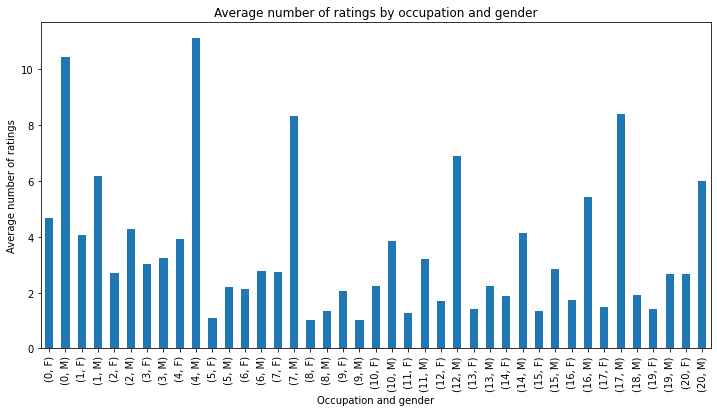

In [10]:
"""Merge the two dataframe to get back the users"""
ratings_and_users = pd.merge(ratings, users, on='user_id')
"""Count the number of ratings by group"""
ratings_by_occupation = ratings_and_users.groupby(['occupation', 'gender'])['rating'].count()
"""Get the number of unique films by group"""
movies_by_occupation = ratings_and_users.groupby(['occupation', 'gender'])['movie_id'].nunique()
"""Compute the average number of ratings by movies"""
avgNumber_ratings_by_occupation = ratings_by_occupation/movies_by_occupation
"""Plot the result"""
avgNumber_ratings_by_occupation.plot(kind='bar', title='Average number of ratings by occupation and gender', ylabel='Average number of ratings', xlabel='Occupation and gender', figsize=(12, 6))
avgNumber_ratings_by_occupation

<center>######################################## 1.1.9 ########################################
</center>

age
1     3.522943
18    3.486941
25    3.522359
35    3.597485
45    3.620910
50    3.715111
56    3.820500
Name: rating, dtype: float64


"We don't really see a huge difference on the average of ratings between age, maybe 56+ are less harsh and [18-25] are more difficult to please."

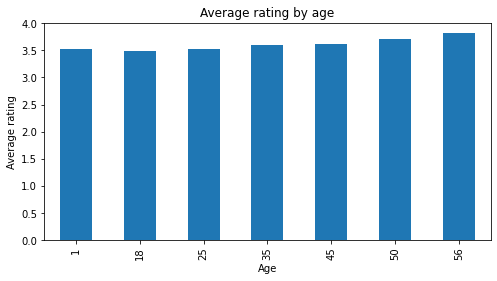

In [11]:
ratings_by_age = ratings_and_users.groupby('age')['rating'].mean()
ratings_by_age.plot(kind='bar', title='Average rating by age', ylabel='Average rating', xlabel='Age', figsize=(8, 4))
print(ratings_by_age)
"""We don't really see a huge difference on the average of ratings between age, maybe 56+ are less harsh and [18-25] are more difficult to please."""

<center>######################################## 1.1.10 ########################################
</center>

In [12]:
ratings_and_users_and_movies = pd.merge(ratings_and_users, movies, on='movie_id')
ratings_by_gender_and_genres = ratings_and_users_and_movies.groupby(['genres', 'gender'])['rating'].mean()
print(ratings_by_gender_and_genres)
"""'Drama|Romance|Western' movies have a average rating of 4 with the females vs 3 whith males, for 'Crime|Mistery' category, it is 2.5 for woman and 3.5 for man"""

genres                       gender
Action;                      F         3.289786
                             M         3.272036
Action|Adventure;            F         3.691358
                             M         3.642578
Action|Adventure|Animation;  F         3.521739
                                         ...   
Thriller;                    M         3.514388
War;                         F         3.880000
                             M         3.898305
Western;                     F         3.644578
                             M         3.864969
Name: rating, Length: 600, dtype: float64


"'Drama|Romance|Western' movies have a average rating of 4 with the females vs 3 whith males, for 'Crime|Mistery' category, it is 2.5 for woman and 3.5 for man"

<center>######################################## 1.2 ########################################
</center>

In [13]:
def predict_a_rating_regarding_a_movie_by_id(m) :
    """Here we predict the rating of a movie_id m"""
    movie_ratings_mean = ratings[ratings['movie_id'] == m]['rating'].mean()
    return movie_ratings_mean

def predict_a_rating_regarding_a_movie_by_name(m) :
    """Here we predict the rating of a movie m by its name"""
    movie_id = movies[movies['Title'] == m]['movie_id'].iloc[0]
    return predict_a_rating_regarding_a_movie_by_id(movie_id)

def evaluation_function(p):
    res = np.array([1, 3, 2, 5, 3, 4, 4, 3, 3, 5, 5, 5, 4, 2, 4, 2, 5, 5, 4, 4, 5, 3, 5, 5, 1, 3, 2, 4, 3, 4, 2, 3, 3, 3, 5, 5, 3, 4, 4, 4, 5, 5, 3, 3, 5, 3, 5, 2, 2, 3, 4])
    return mean_squared_error(p,res)

# print(evaluation_function(ratings_test['movie_id'].apply(predict_a_rating_regarding_a_movie_by_id)))
ratings_test['prediction_v1'] = ratings_test['movie_id'].apply(predict_a_rating_regarding_a_movie_by_id)
evaluation_prediction_v1 = evaluation_function(ratings_test['prediction_v1'])
print(evaluation_prediction_v1)

1.1132087735364136


<center>######################################## 1.3 ########################################
</center>

In [14]:
"""Which movie has the highest average rating ?"""
movies_ratings_mean = movies_and_ratings.groupby('Title')['rating'].mean()
movies_ratings_mean.sort_values(ascending=False, inplace=True)

"""There is 13 equal movies with the higher rate, here we plot the top 13 movies"""
# movies_ratings_mean.head(13).plot(kind='barh')
top13_movies = movies_ratings_mean.head(13)
# print(top13_movies)

"""How many ratings have each of these movies ?"""
top13_movies_ratings_count = movies_and_ratings[movies_and_ratings['Title'].isin(top13_movies.index)].groupby('Title')['rating'].count()
top13_movies_ratings_count.sort_values(ascending=False, inplace=True)
print(top13_movies_ratings_count)

Title
Last September, The                     2
On Any Sunday                           2
Baby, The                               1
Big Trees, The                          1
Black Sunday                            1
Criminal Lovers                         1
Devil Girl From Mars                    1
Dingo                                   1
Gate of Heavenly Peace, The             1
Hour of the Pig, The                    1
Mamma Roma                              1
Those Who Love Me Can Take the Train    1
Train of Life                           1
Name: rating, dtype: int64


In [15]:
# write a function that computes the weighted rating of a movie given its id movie_id and a rating matrix (as the one you have, with all the ratings given by users to the different movies)
def weighted_rating(movie_id, rating_matrix):
    """Here we compute the weighted rating of a movie given its id movie_id and a rating matrix"""
    # get the number of ratings for the movie
    v = rating_matrix[rating_matrix['movie_id'] == movie_id]['rating'].count()
    # get the mean of ratings for the movie
    R = rating_matrix[rating_matrix['movie_id'] == movie_id]['rating'].mean()
    # get the mean of ratings for all movies
    C = rating_matrix['rating'].mean()
    # get the 75-percentile value of number of ratings for the different movies of the dataset
    n = rating_matrix['movie_id'].value_counts().quantile(0.75)
    # compute the weighted rating
    weighted_rating = (v/(v+n)) * R + (n/(v+n)) * C
    return weighted_rating
# print(weighted_rating(1, ratings))

movies['weighted_rating'] = movies['movie_id'].apply(weighted_rating, rating_matrix=ratings)
movies.sort_values(by='weighted_rating', ascending=False).head(10)
"""The movie with the highest weighted rating is not the same as the one with the highest average rating : it is "Shindler's List" with a weighted rating of 4.405165."""

'The movie with the highest weighted rating is not the same as the one with the highest average rating : it is "Shindler\'s List" with a weighted rating of 4.405165.'

In [16]:
# Use this weighted rating to predict the ratings of all pairs in the test dataset.
ratings_test['prediction_v2'] = ratings_test['movie_id'].apply(weighted_rating, rating_matrix=ratings)
evaluation_prediction_v2 = evaluation_function(ratings_test['prediction_v2'])
print(evaluation_prediction_v2)
"""Yes, we have improved our predictions, the weighted rating is better than the average rating."""

1.0650475191489384


'Yes, we have improved our predictions, the weighted rating is better than the average rating.'

<center>######################################## 1.4 ########################################
</center>

In [17]:
# To predict the rating given by user u to movie m, we have to compute the average rating of movie m but only ratings given by users of the same gender as user u.
def predict_a_rating_regarding_gender(movie_id, gender) :
    return ratings_and_users[(ratings_and_users['movie_id'] == movie_id) & (ratings_and_users['gender'] == gender)]['rating'].mean()

# To predict the rating given by user u to movie m, we have to compute the average rating of movie m but only ratings given by users of the same gender as user u.
def get_the_gender(user_id) :
    return users[users['user_id'] == user_id]['gender'].values[0]

ratings_test["prediction_v3"] = ratings_test.apply(lambda x: predict_a_rating_regarding_gender(x['movie_id'], get_the_gender(x['user_id'])), axis=1)
evaluation_prediction_v3 = evaluation_function(ratings_test['prediction_v3'])
print(evaluation_prediction_v3)


1.0578446896985565


<center>######################################## 1.5 ######################################## <br> <br>
######################################## 1.5.1 ######################################## 
</center>

In [18]:
def similarity_between_two_movies(m1_id, m2_id) :
    similarity = -1

    #Si m1 et m2 ont plus de 40 notes alors :
    if(ratings[ratings['movie_id'] == m1_id]['rating'].count() > 40 and ratings[ratings['movie_id'] == m2_id]['rating'].count() > 40) :
        # On regarde quels sont les users qui ont notés les 2 : sous la forme 'user_id' -> False/True
        users_rated_both_movies_for_m1 = ratings[ratings['movie_id']== m1_id]['user_id'].isin(ratings[ratings['movie_id']==m2_id]['user_id'])
        users_rated_both_movies_for_m2 = ratings[ratings['movie_id']== m2_id]['user_id'].isin(ratings[ratings['movie_id']==m1_id]['user_id'])

        # On récupère les ID où c'est True, donc la c'est les user_id qui ont notés les 2 films
        usersId_rated_both_movies_for_m1 = ratings[ratings['movie_id']== m1_id][users_rated_both_movies_for_m1]['user_id']
        usersId_rated_both_movies_for_m2 = ratings[ratings['movie_id']== m2_id][users_rated_both_movies_for_m2]['user_id']

        # On fait une Series avec les notes
        ratings_m1 = ratings[ratings['movie_id']== m1_id]['rating']
        ratings_m2 = ratings[ratings['movie_id']== m2_id]['rating']
        # On récupère les notes pour les users qui ont notés les 2 films
        ratings_m1_by_user = ratings_m1[ratings_m1.index.isin(usersId_rated_both_movies_for_m1.index)]
        ratings_m2_by_user = ratings_m2[ratings_m2.index.isin(usersId_rated_both_movies_for_m2.index)]

        # # Create a DataFrame with the user_id as the index and the rating of m1 and m2 as columns
        # tab = pd.DataFrame({'m1' : ratings_m1_by_user.iloc[0], 'm2' : ratings_m2_by_user.iloc[0]}, index = usersId_rated_both_movies_for_m1)
        # print(tab.head(5))

        # Faire une matrice de corrélation avec les ratings de m1 et m2 pour comparer les 2
        res = np.corrcoef(ratings_m1_by_user, ratings_m2_by_user)

        # Récupérer la valeur qui nous intéresse
        similarity = res[0,1]
    return similarity
# print(similarity_between_two_movies(1, 3114))

def similarity_between_two_movies_by_names(m1, m2) : 
    """Get the id of the movies m1 and m2"""
    m1_id = movies[movies['Title'] == m1]['movie_id'].values[0]
    m2_id = movies[movies['Title'] == m2]['movie_id'].values[0]
    return similarity_between_two_movies(m1_id, m2_id)

print(similarity_between_two_movies_by_names('Toy Story', 'Toy Story 2'))

0.6551398800949261


<center>######################################## 1.5.2 ########################################</center>

In [19]:
# Write a function that predicts the rating given by a user u to a movie m with the nearest-neighbor approach explained above (with parameter k)
def predict_a_movie_nearest_neighbour(m, u, k) : 
    # Get all the movies rated by u
    movies_rated_by_u = ratings[ratings['user_id'] == u]['movie_id']
    # Now get the titles and movie_id of the movies rated by u
    movies_rated_by_u_titles = movies[movies['movie_id'].isin(movies_rated_by_u)]['Title']
    # Compute the similarity between m and all the movies rated by u using similarity_between_two_movies
    similarity = movies_rated_by_u_titles.apply(similarity_between_two_movies, m2_id=m)
    # Get the k movies with the highest similarity and get the movie Title
    k_most_similar_movies = similarity.sort_values(ascending=False).head(k)
    similar_movies_id = movies.loc[k_most_similar_movies.index]['movie_id']
    # Get the ratings of the k_most_similar_movies
    k_most_similar_movies_ratings = ratings[ratings['movie_id'].isin(similar_movies_id)]
    # Print the k_most_similar_movies_ratings with user_id == u_id
    user_k_most_similar_movies_rating = k_most_similar_movies_ratings[k_most_similar_movies_ratings['user_id'] == u]
    # Predict rating(m, u) as : (1/k) * sum(rating(m', u) for m' in k_most_similar_movies)
    average_rating = (1/k) * user_k_most_similar_movies_rating['rating'].sum()
    return average_rating
    
print(predict_a_movie_nearest_neighbour(1, 1, 1))

5.0


<center>######################################## 1.5.3 ########################################</center>

In [20]:
ratings_test["prediction_v4_k1"] = ratings_test.apply(lambda x : predict_a_movie_nearest_neighbour(x['movie_id'], x['user_id'], 1), axis=1)
evaluation_prediction_v4_k1 = evaluation_function(ratings_test['prediction_v4_k1'])
print("k1 : ", evaluation_prediction_v4_k1)

ratings_test["prediction_v4_k2"] = ratings_test.apply(lambda x : predict_a_movie_nearest_neighbour(x['movie_id'], x['user_id'], 2), axis=1)
evaluation_prediction_v4_k2 = evaluation_function(ratings_test['prediction_v4_k2'])
print("k2 : ", evaluation_prediction_v4_k2)

ratings_test["prediction_v4_k3"] = ratings_test.apply(lambda x : predict_a_movie_nearest_neighbour(x['movie_id'], x['user_id'], 3), axis=1)
evaluation_prediction_v4_k3 = evaluation_function(ratings_test['prediction_v4_k3'])
print("k3 : ", evaluation_prediction_v4_k3)

k1 :  1.9215686274509804
k2 :  1.3333333333333333
k3 :  1.2614379084967322


<center>######################################## 1.5.4 ########################################</center>

In [21]:
ratings_test["prediction_v4_k4"] = ratings_test.apply(lambda x : predict_a_movie_nearest_neighbour(x['movie_id'], x['user_id'], 4), axis=1)
evaluation_prediction_v4_k4 = evaluation_function(ratings_test['prediction_v4_k4'])
print("k4 : ", evaluation_prediction_v4_k4)

ratings_test["prediction_v4_k5"] = ratings_test.apply(lambda x : predict_a_movie_nearest_neighbour(x['movie_id'], x['user_id'], 5), axis=1)
evaluation_prediction_v4_k5 = evaluation_function(ratings_test['prediction_v4_k5'])
print("k5 : ", evaluation_prediction_v4_k5)

"""We can see that, as we expected, the more k is high, the better the prediction is, but not anymore after k=4. So we will choose k=4 for our final prediction."""

k4 :  1.2401960784313726
k5 :  1.2462745098039214


'We can see that, as we expected, the more k is high, the better the prediction is, but not anymore after k=4. So we will choose k=4 for our final prediction.'

<center>######################################## 1.6 ######################################## <br> <br>
######################################## 1.6.1 ########################################</center>

In [22]:
def similarity_between_user(u, v) :
    movies_rated_by_u = ratings[ratings['user_id'] == u]['movie_id']
    movies_rated_by_v = ratings[ratings['user_id'] == v]['movie_id']
    movies_rated_by_both = movies_rated_by_u[movies_rated_by_u.isin(movies_rated_by_v)]
    if movies_rated_by_both.count() < 5 : 
        return 10000
    else :
        return (1/movies_rated_by_both.count()) * (np.sum(np.square((ratings[ratings['movie_id'].isin(movies_rated_by_both) & (ratings['user_id'] == u)]['rating']).values - (ratings[ratings['movie_id'].isin(movies_rated_by_both) & (ratings['user_id'] == v)]['rating'])).values))

print(similarity_between_user(5, 8))

2.6666666666666665


<center>######################################## 1.6.2 ########################################</center>

In [23]:
def predict_a_movie_user_nearest_neighbour(m, u, k) : 
    #Get all the user that have rated m
    users_rated_m = ratings[ratings['movie_id'] == m]['user_id']
    similarity = users_rated_m.apply(similarity_between_user, v=u)
    #Get the k users with the lowest similarity except the first one
    k_most_similar_users = similarity.sort_values(ascending=True).head(k+1).tail(k)
    #Get the user id of the k_most_similar_users
    similar_users_id = ratings.loc[k_most_similar_users.index]['user_id']
    average_rating = (1/k) * (ratings[ratings['user_id'].isin(similar_users_id.values) & (ratings['movie_id'] == m)]['rating'].sum())
    return average_rating

print(predict_a_movie_user_nearest_neighbour(1, 1, 1))

4.0


<center>######################################## 1.6.3 ########################################</center>

In [24]:
# very long to compute
ratings_test['prediction_v5_k1'] = ratings_test.apply(lambda x : predict_a_movie_user_nearest_neighbour(x['movie_id'], x['user_id'], 1), axis=1)
evaluation_prediction_v5_k1 = evaluation_function(ratings_test['prediction_v5_k1'])
print("k1 : ", evaluation_prediction_v5_k1)
# k1 :  1.1372549019607843

ratings_test['prediction_v5_k2'] = ratings_test.apply(lambda x : predict_a_movie_user_nearest_neighbour(x['movie_id'], x['user_id'], 2), axis=1)
evaluation_prediction_v5_k2 = evaluation_function(ratings_test['prediction_v5_k2'])
print("k2 : ", evaluation_prediction_v5_k2)
# k2 :  0.9705882352941176

ratings_test['prediction_v5_k3'] = ratings_test.apply(lambda x : predict_a_movie_user_nearest_neighbour(x['movie_id'], x['user_id'], 3), axis=1)
evaluation_prediction_v5_k3 = evaluation_function(ratings_test['prediction_v5_k3'])
print("k3 : ", evaluation_prediction_v5_k3)
# k3 :  0.9368191721132899

k1 :  1.1372549019607843
k2 :  0.9705882352941176
k3 :  0.9368191721132899


<center>######################################## 1.6.4 ########################################</center>

In [81]:
# very long to compute
ratings_test['prediction_v5_k4'] = ratings_test.apply(lambda x : predict_a_movie_user_nearest_neighbour(x['movie_id'], x['user_id'], 4), axis=1)
evaluation_prediction_v5_k4 = evaluation_function(ratings_test['prediction_v5_k4'])
print("k4 : ", evaluation_prediction_v5_k4)
# k4 :  0.8811274509803921

ratings_test['prediction_v5_k5'] = ratings_test.apply(lambda x : predict_a_movie_user_nearest_neighbour(x['movie_id'], x['user_id'], 5), axis=1)
evaluation_prediction_v5_k5 = evaluation_function(ratings_test['prediction_v5_k5'])
print("k5 : ", evaluation_prediction_v5_k5)
# k5 :  0.9333333333333335

"""We can see that, as we expected, the more k is high, the better the prediction is, but not anymore after k=4. So we will choose k=4 for our final prediction."""

k4 :  0.8811274509803921
k5 :  0.9333333333333335


'We can see that, as we expected, the more k is high, the better the prediction is, but not anymore after k=4. So we will choose k=4 for our final prediction.'